<a href="https://colab.research.google.com/github/Akowsor15/Project_chatbot/blob/main/Twitter_Sentiment_Analysis_Lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving a general sentiment analysis problem the following steps are:
1. preprocessing and cleaning the raw text of the tweets
2. Exploring the cleaned text and getting intuition about the context of tweets.
3. Extracting numerical features from the data.
4. Using those feature sets to train models and identify the sentiments of the tweets.

# Understanding the problem statement

Classifying racist or sexist tweets from other tweets.
Label 1 denotes the tweet is racist or sexist. Label 0 denotes the tweet is not racist or sexist

# Tweets preprocessing and cleaning.

Objective of this step is to clean noise those are less relevent to find the sentiment of tweets like punctuation. 

In [22]:
#extraction of numerical features from Twitter text data.
#importing libraries.
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
train  = pd.read_csv('/content/train_E6oV3lV.csv')
test = pd.read_csv('/content/test_tweets_anuFYb8.csv')
train.head()
#Data has 3 columns: id, label and tweets is the binary target variable. Tweet contains tweets that will clean and preprocess.
#Get rid of punctuations, numbers and special characters. Along with small words like all.

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Removing Twitter handles

In [3]:
#These dont convey much information
#combining train and test data will solve performance on the same step twice on test and train.
combi = train.append(test, ignore_index=True)


In [4]:
#function to remove unwanted text patterns from the tweets.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

Creating a new column known as tidy_tweet. This will contain the cleaned and process tweets. 

In [5]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

# removing punctuation letters and special characters

In [6]:
#replacing everything except hashtags and spaces.
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-6-b858811c67c9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


# Removing short words

In [7]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


# Tokenization

Tokens are individual terms or words, and Tokenization is the process of splitting a string of text into tokens.

In [8]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

# Stemming

It is a rule-based process of stripping the suffixes from a word. 

In [9]:
#For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [10]:
#stitching the tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet


# Story generation and visualization from tweets

We will be exploring and visualizing the data. This is an essential step in gaining insights. 
We must ask questions in relation to the data.
What are the most common words in the entire dataset?
What are the most common words in the dataset for negative and positive tweets, respectively?
How many hashtags are there in a tweet?
Which trends are associated with my dataset?
Which trends are associated with either of the sentiments? Are they compatible with the sentiments?
 

# Understanding the common words used in the tweets: wordCloud

Seeing how well the given sentiments are distributed across the train dataset. To do this we can understand the common words by plotting wordcloud.
A wordcloud is a visualization where the most frequent words appear in large size and less frequent words appear in smaller size.

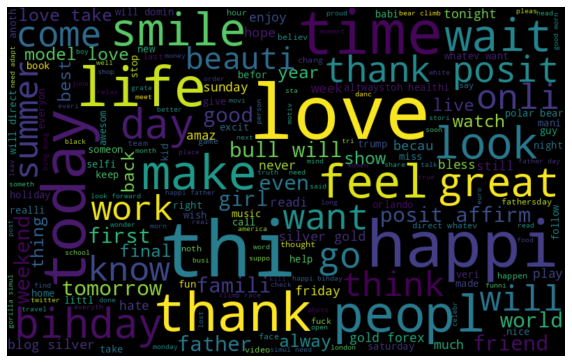

In [11]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Words in non-racist or sexist tweets

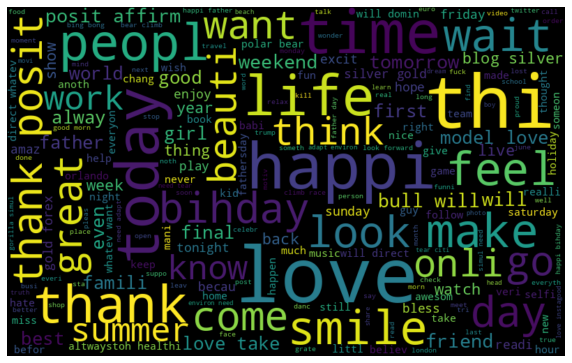

In [12]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Racist Sexist tweets

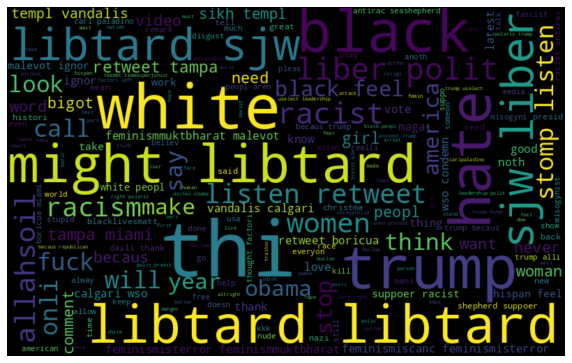

In [13]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Understanding the impact of Hashtags on tweets sentiment

Hashtags in Twitter are synonymous with the ongoing Trends on Twitter at any particular point in time. We should check whether these hashtags add any value to sentiment analysis. This will help in distniguishing tweets in different sentiments.

In [14]:
#storing the trend terms in two seperate lists. One for non-racist ro sexist tweete and the other for racist or sexist tweet.
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Checking the hashtag in the non-racist sexit tweet.

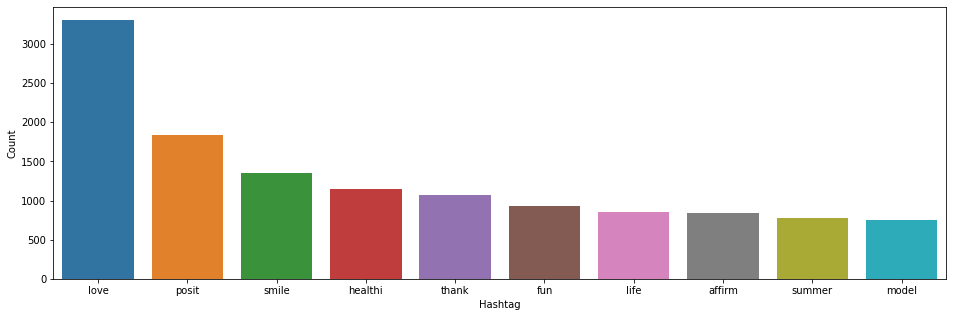

In [15]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Checking the hashtag in the racist sexist tweet.

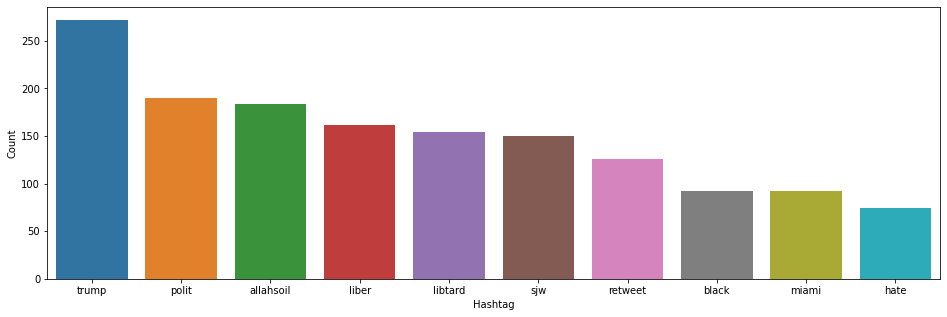

In [16]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# Extracting features from cleaned tweets

To analyse a preprocessed data it needs to be converted into features. Depending upon the usage, feature and text, it can be assorted using bag of words and word embeddings. 

# Bag of word features

It is a method to represent tetx into numerical features.

In [17]:
#Example: D1: He is a lazy boy. She is also lazy.
#D2: Smith is a lazy person.
#The list created would consist of all the unique tokens in the corpus C.
#= [‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]
#Here, D=2, N=6
#bag of word features can be used to create sklearn’s CountVectorizer function.
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

# TF-IDF features

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words. This appears in good numbers in fewer documents.
Important terms related to TF-IDF
TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

# Model Building sentiment analysis

For this part i will be using logistic regression to build the models. It predicts the probability of occurance of an event by fitting the data into a logic function.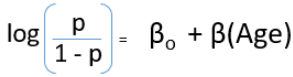

# Building a model using Bag-Of-Words features 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) # calculating f1 score

0.5333333333333333

In [20]:
#Using the model to predict for the test data.
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

# Building model using TF-IDF

In [21]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5323868677905945